In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Edit PYTHONPATH
import sys,os,os.path
sys.path.append(os.path.expanduser('~/git'))

from FixedLengthPreprocess import ArmPreprocess
from BinaryClassification.crf_models.CRFModel import CRFModel

import numpy as np
import os
from sklearn.model_selection import train_test_split
from division_plot_general import plot_binaries

In [2]:
test_folder="/Volumes/Tesi/Dataset/arm-binaries/coreutils_O3"

In [3]:
%%time

arm_feat = ArmPreprocess()

paths = [f_path.path for f_path in os.scandir(test_folder)]
X, y = arm_feat.preprocess(paths)
X_train, X_test, y_train, y_test, paths_train, paths_test = train_test_split(X, y, paths, test_size=0.33)

CPU times: user 7.02 s, sys: 1.7 s, total: 8.72 s
Wall time: 21.1 s


In [4]:
crf = CRFModel(
    lookahead=1,
    lookbehind=1,
    max_iter=10,
    C=1,
    verbose=True,
)

In [5]:
%time crf.fit(X_train, y_train)

Iteration 0
dual: 3.886108, dual_gap: 1392.584312, primal: 1396.470420
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Calculating final objective.
CPU times: user 5.91 s, sys: 160 ms, total: 6.07 s
Wall time: 3.4 s


CRFModel(C=1, lookahead=1, lookbehind=1, max_iter=10, verbose=True)

In [6]:
#crf.save('classifiers/crf_{}.pkl'.format(platform))

coreutils_O3_cp
coreutils_O3_tsort
coreutils_O3_seq
coreutils_O3_md5sum
coreutils_O3_truncate
coreutils_O3_users
coreutils_O3_sha256sum
coreutils_O3_mkfifo
coreutils_O3_pwd
coreutils_O3_stdbuf
coreutils_O3_sha384sum
coreutils_O3_sum
coreutils_O3_true
coreutils_O3_dd
coreutils_O3_nice
coreutils_O3_chmod
coreutils_O3_split
coreutils_O3_factor
coreutils_O3_pinky
coreutils_O3_stty
Average accuracy: 99.995%


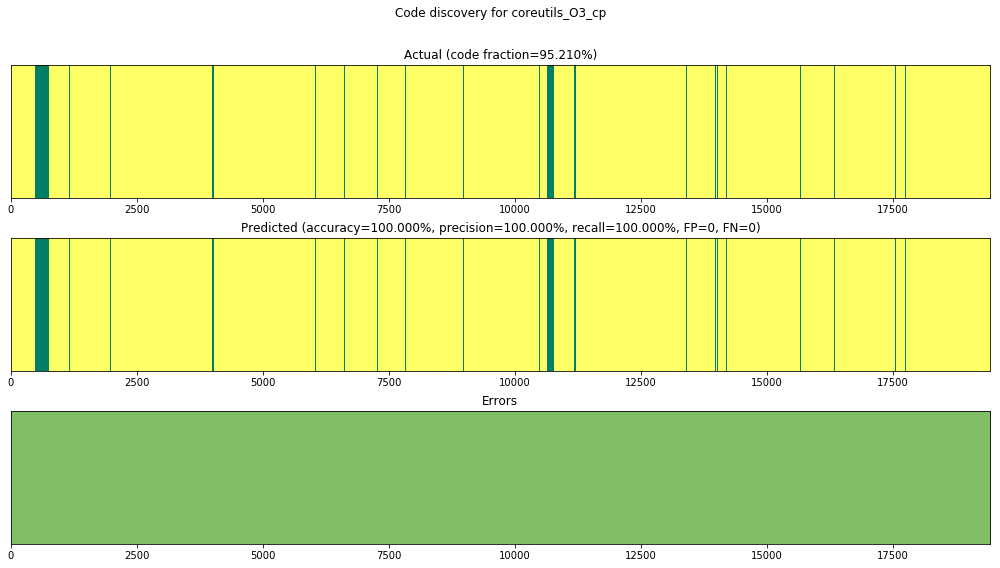

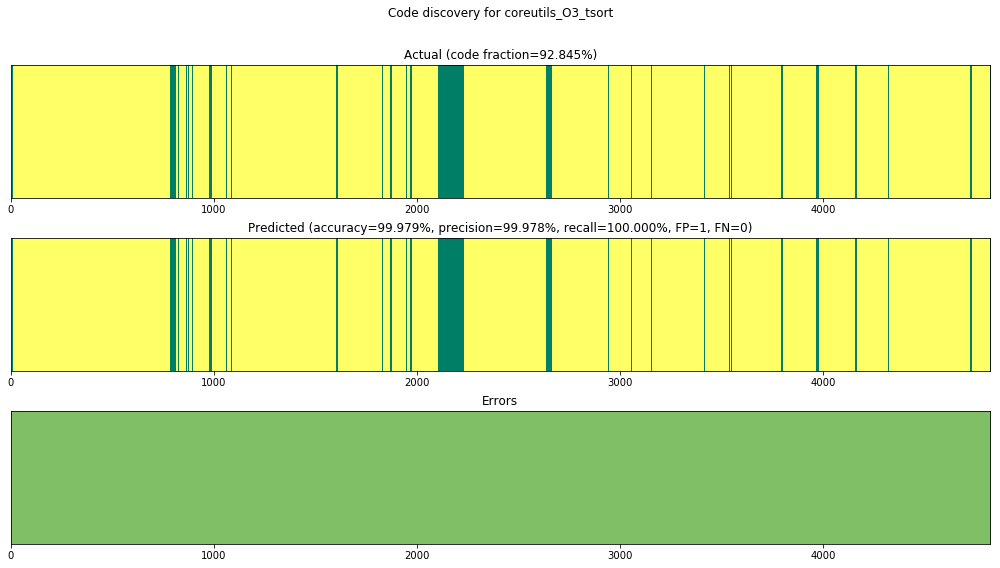

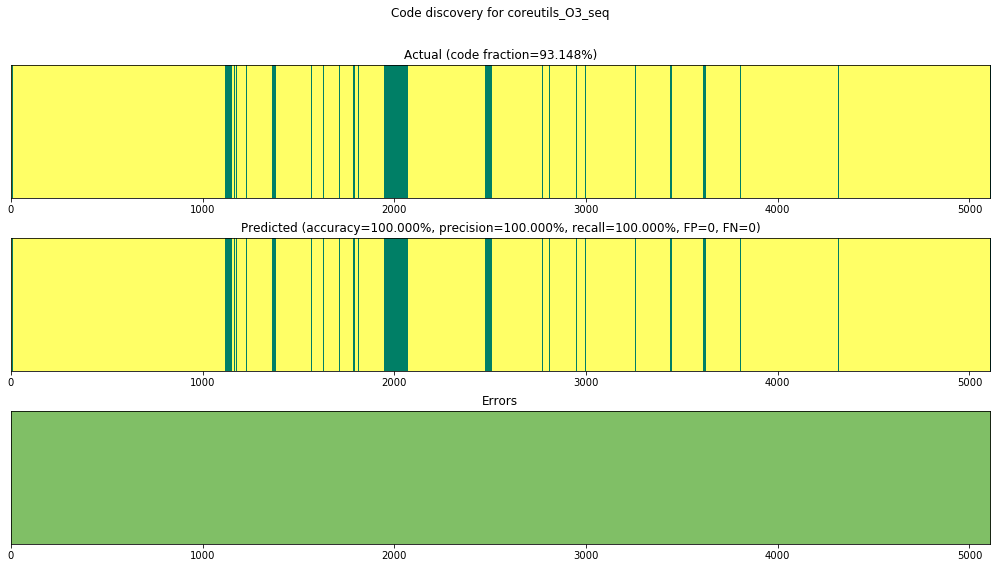

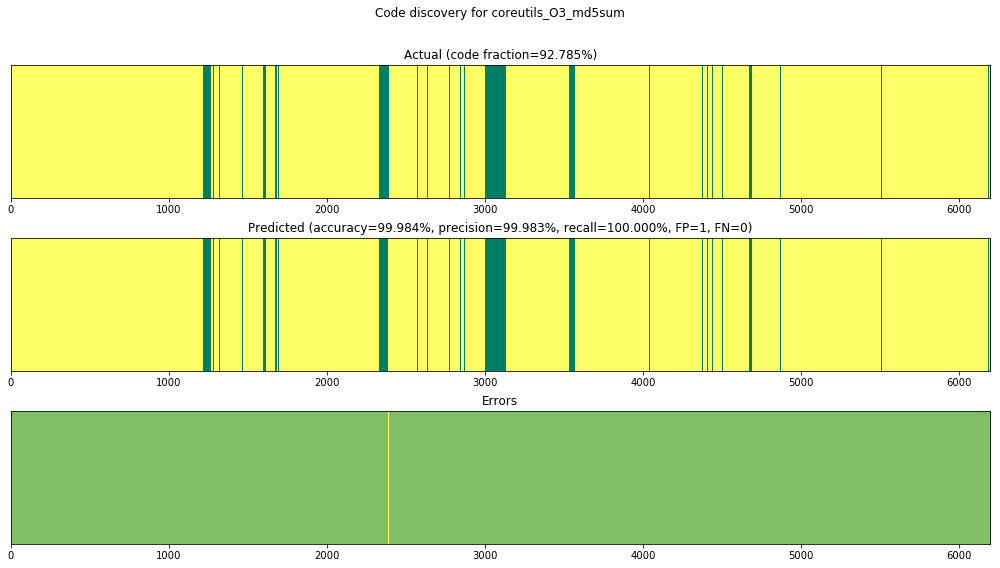

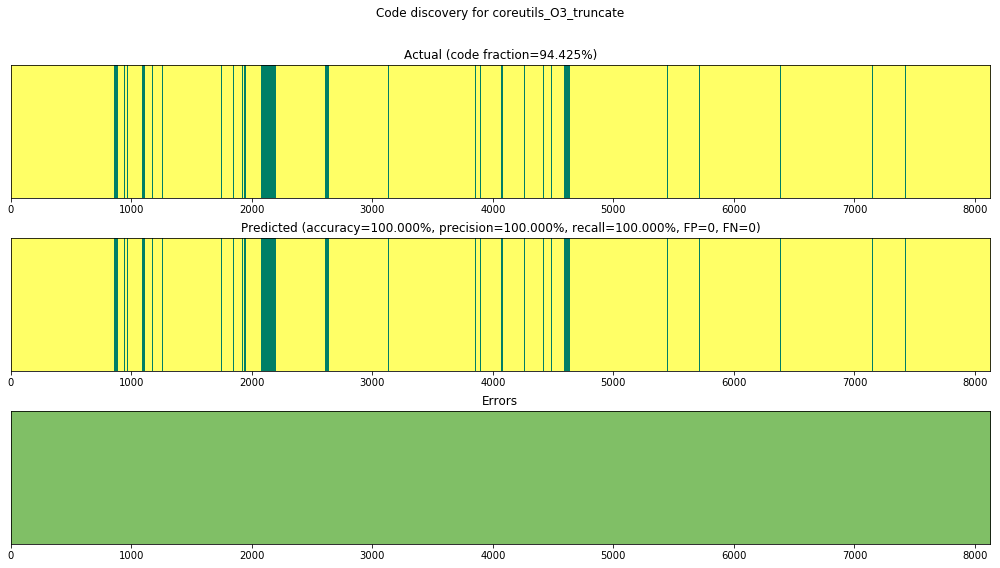

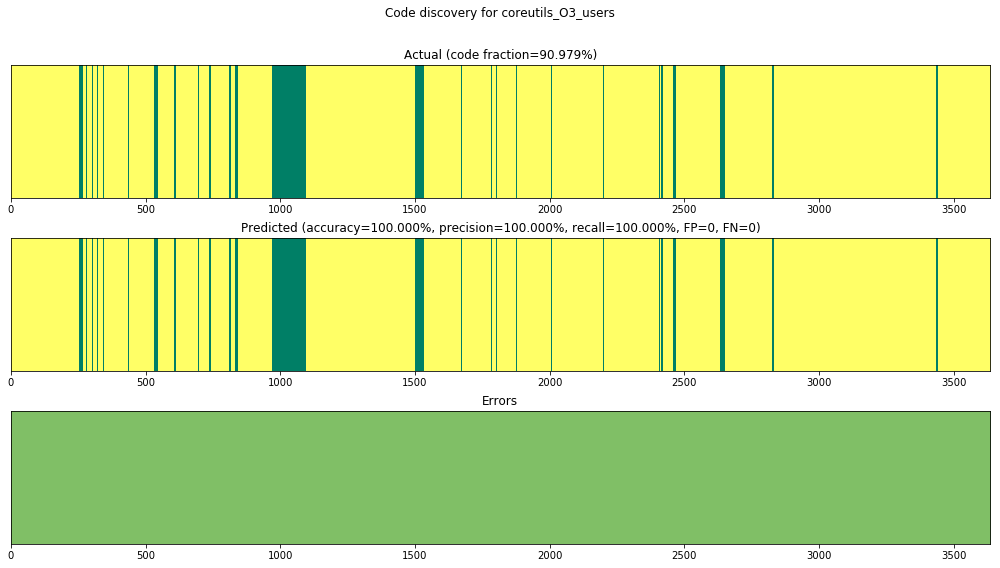

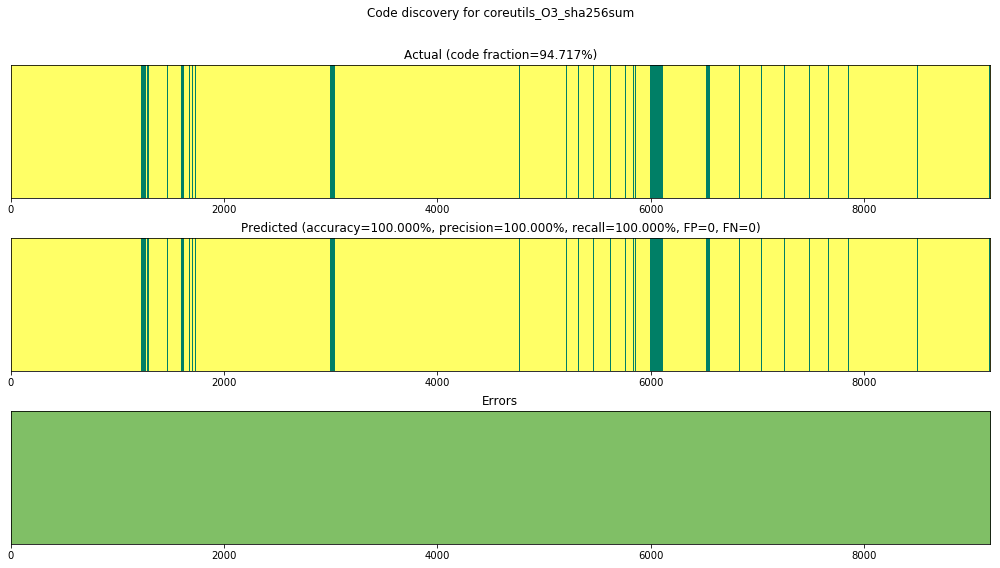

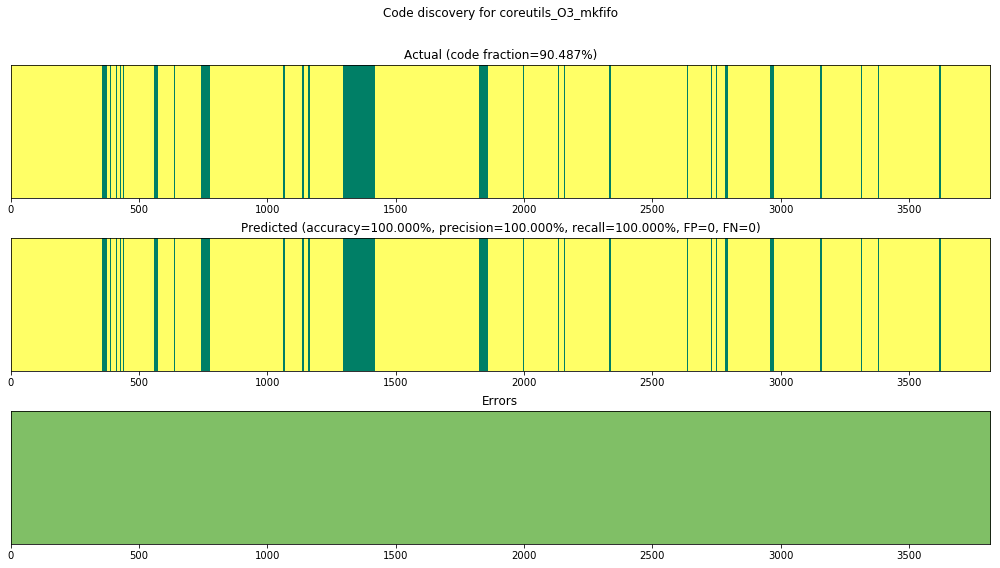

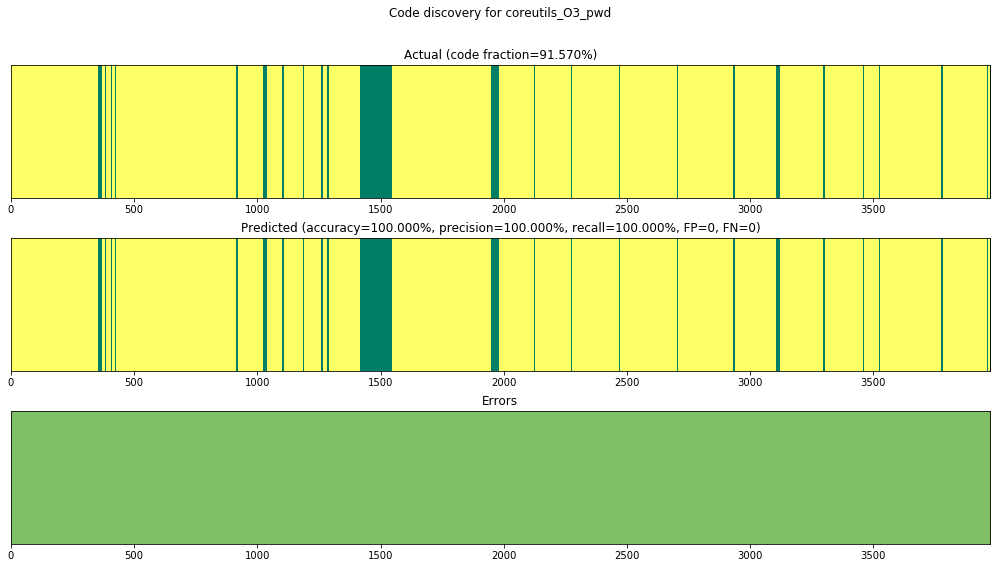

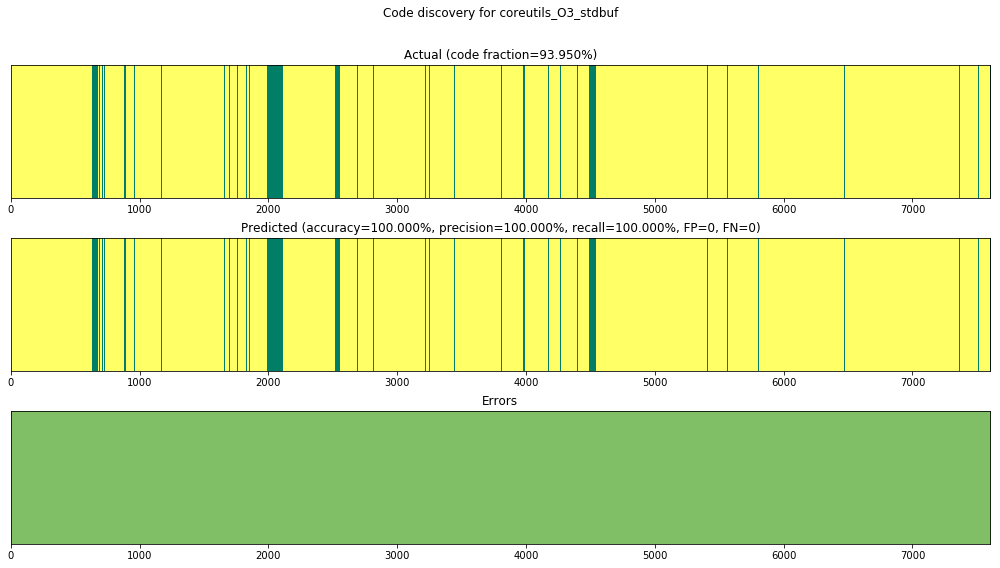

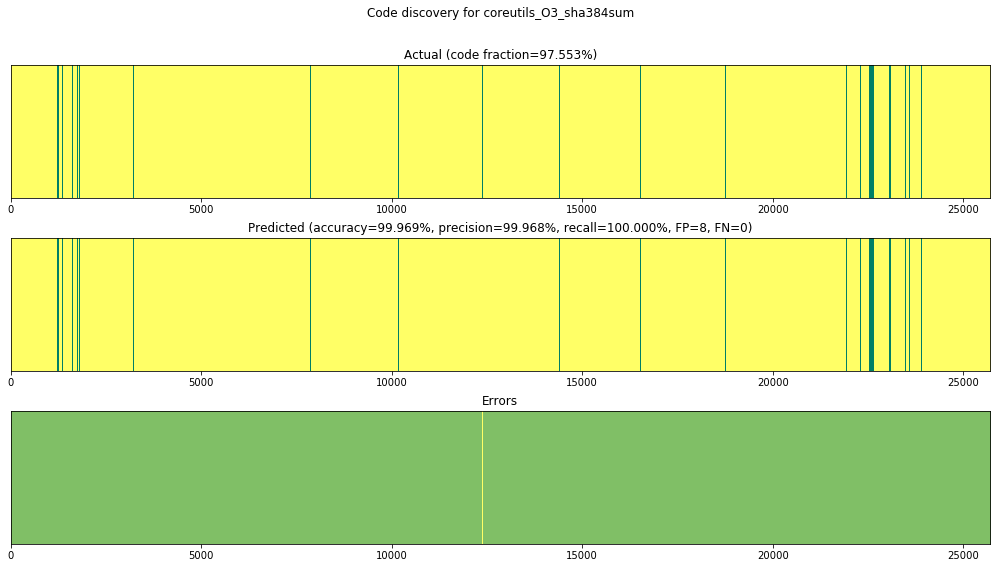

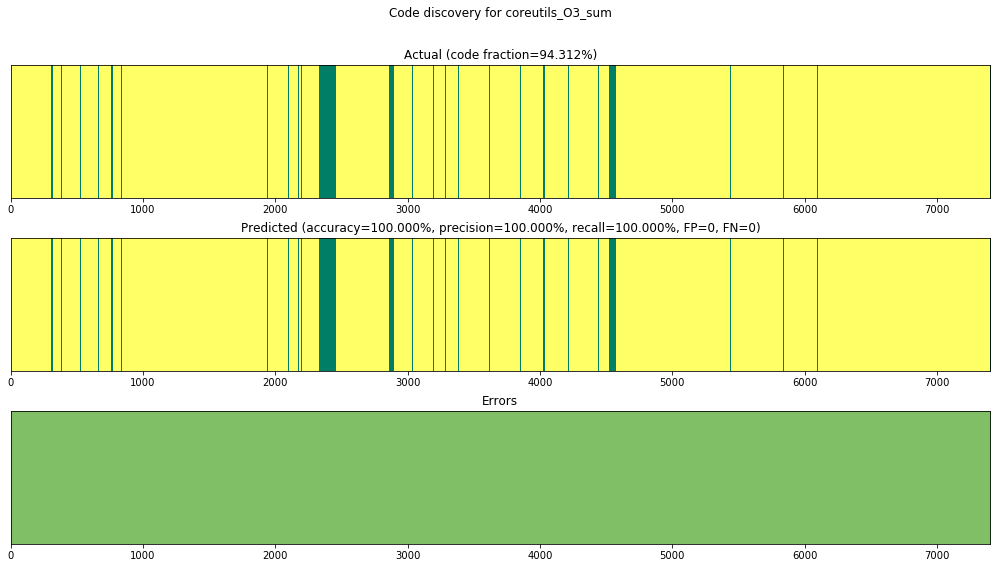

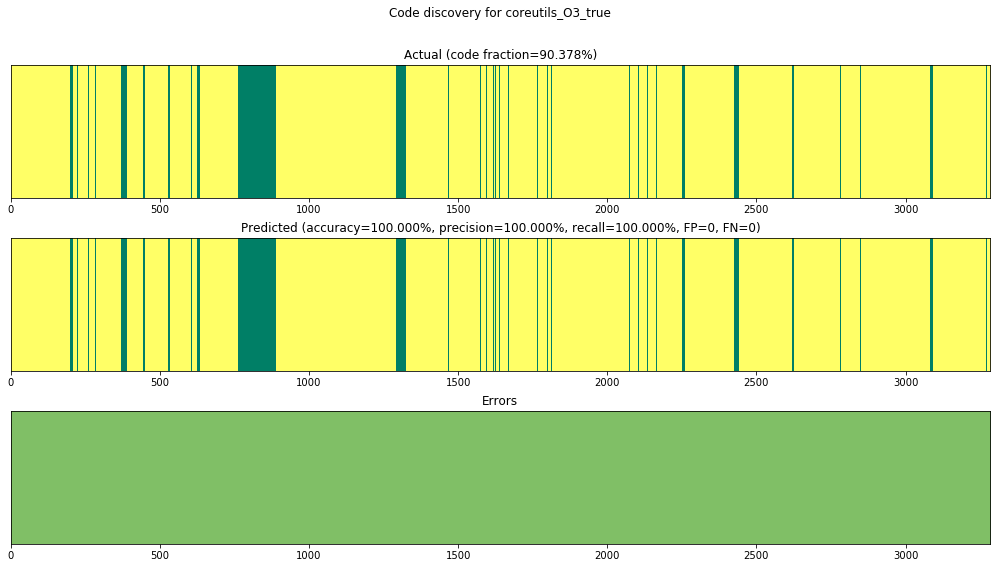

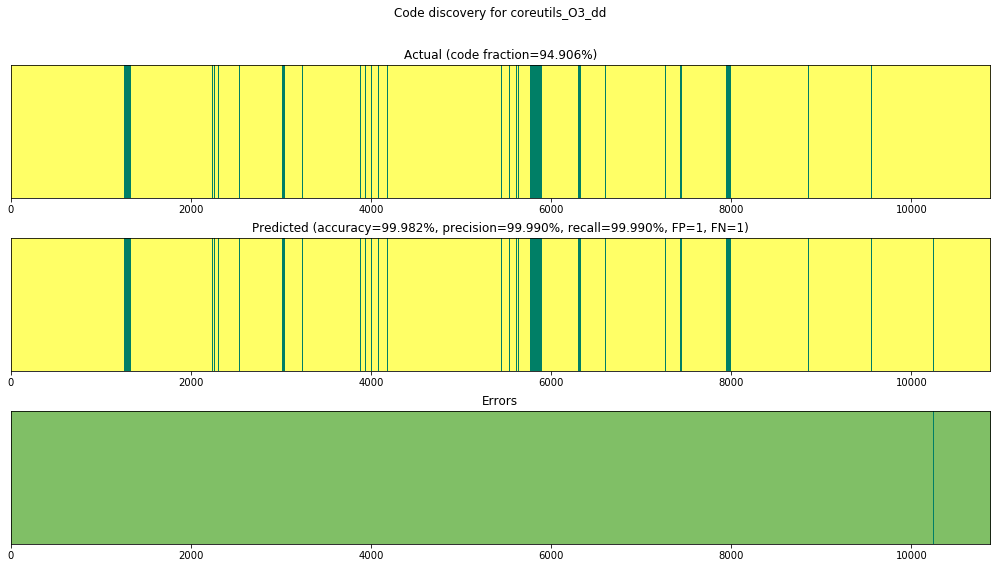

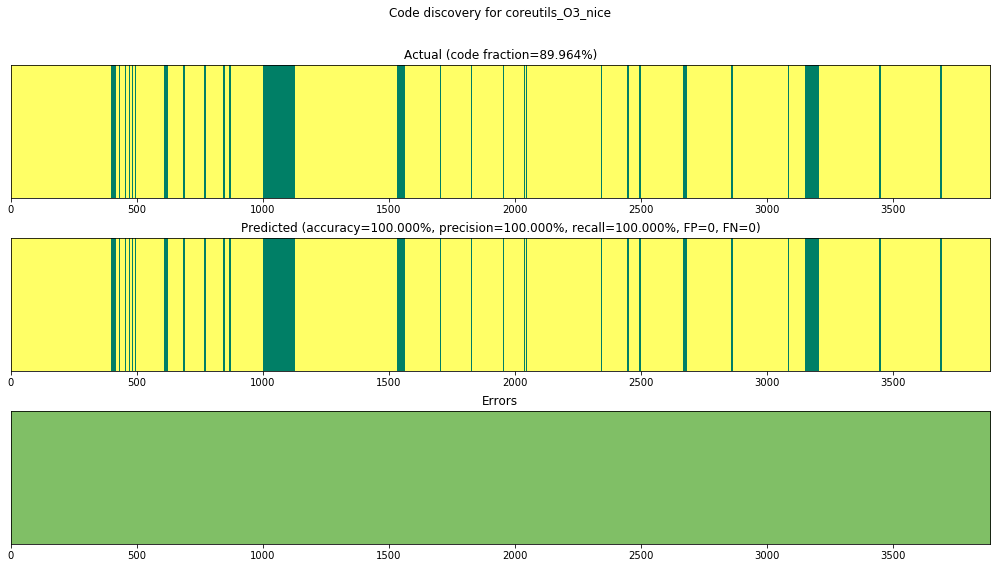

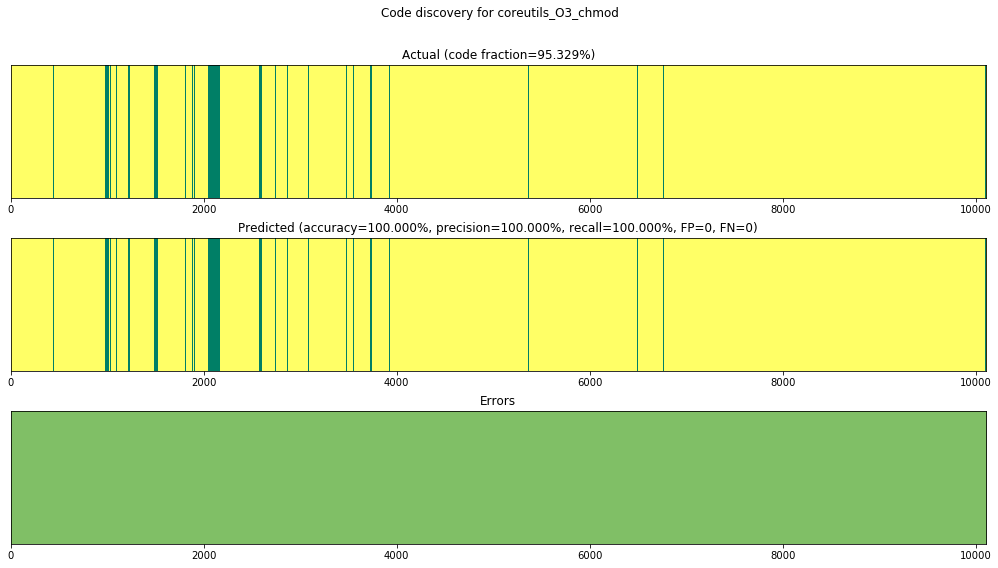

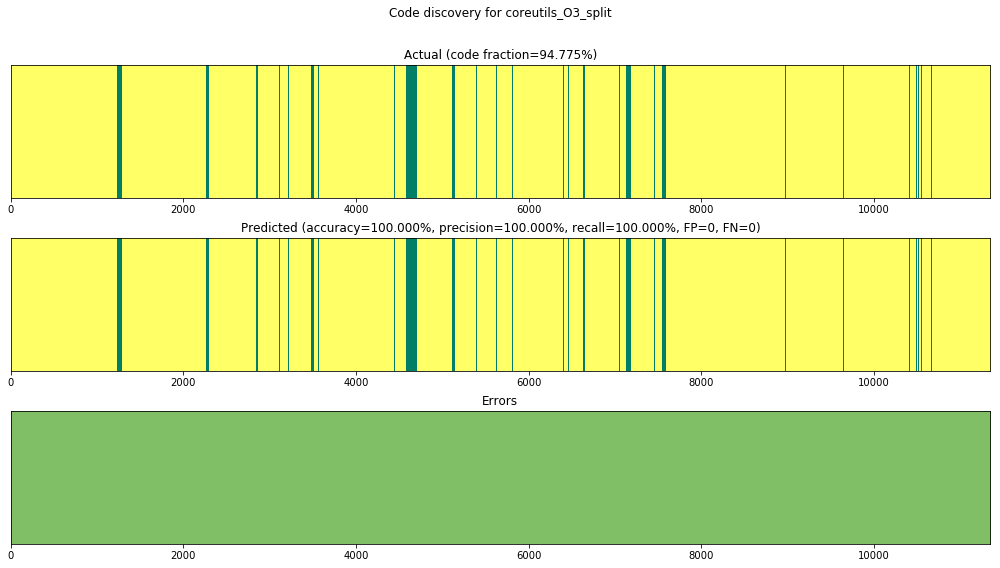

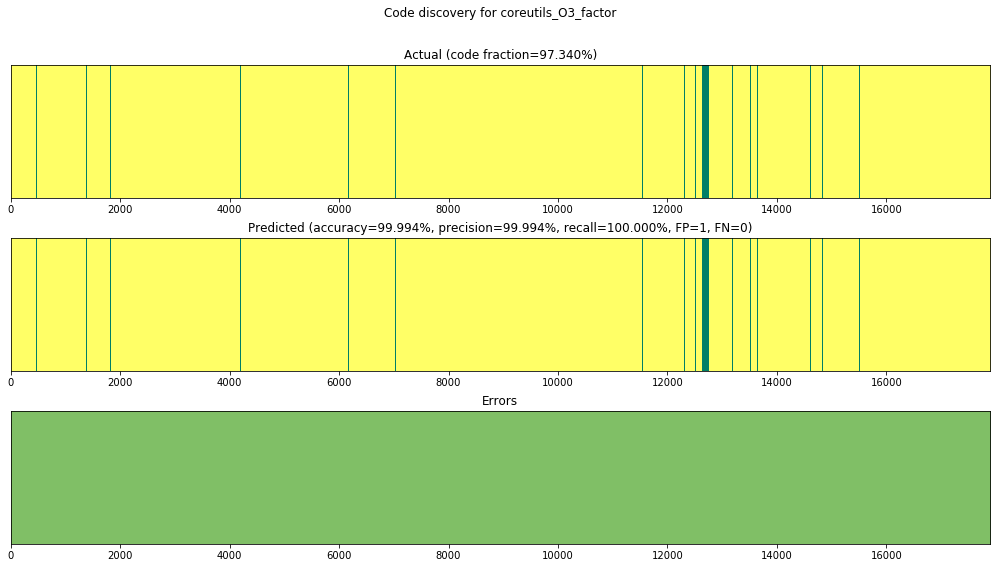

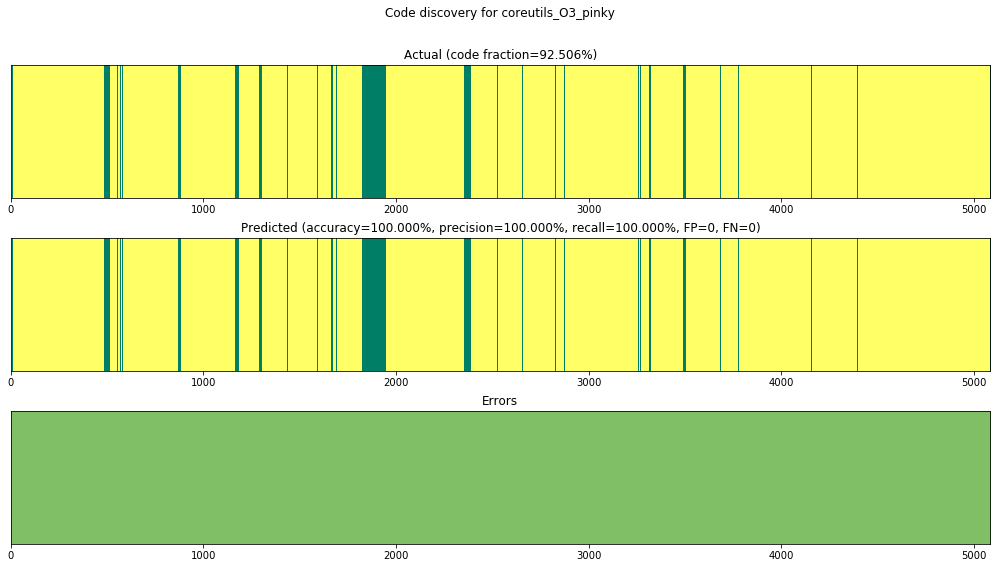

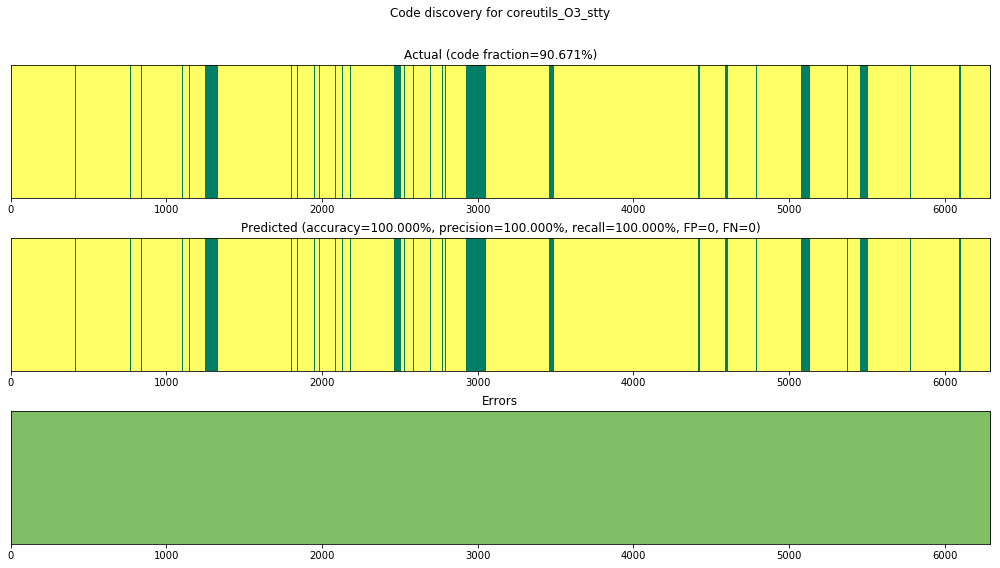

In [11]:
accuracies = []

for x, y, path in list(zip(X_test, y_test, paths_test))[:20]:
    acc, fp, fn = plot_binaries(crf, x, y, path)
    accuracies.append(acc)
    
print("Average accuracy: {:.3f}%".format(np.mean(accuracies)*100))

coreutils_O0_[
coreutils_O0_base64
coreutils_O0_basename
coreutils_O0_cat
coreutils_O0_chcon
coreutils_O0_chgrp
coreutils_O0_chmod
coreutils_O0_chown
coreutils_O0_chroot
coreutils_O0_cksum
coreutils_O0_comm
coreutils_O0_cp
coreutils_O0_csplit
coreutils_O0_cut
coreutils_O0_date
coreutils_O0_dd
coreutils_O0_df
coreutils_O0_dir
coreutils_O0_dircolors
coreutils_O0_dirname
Average accuracy: 99.987%


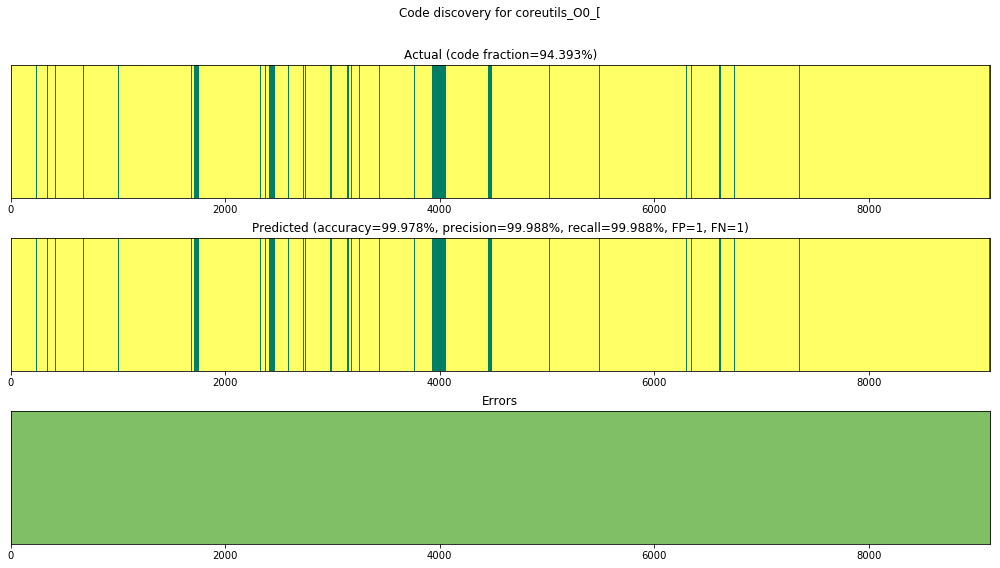

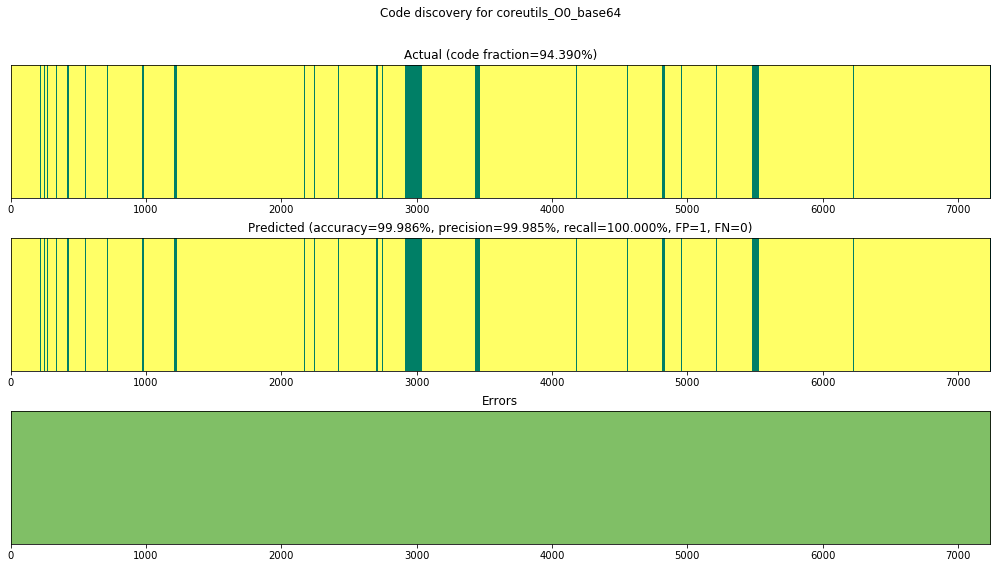

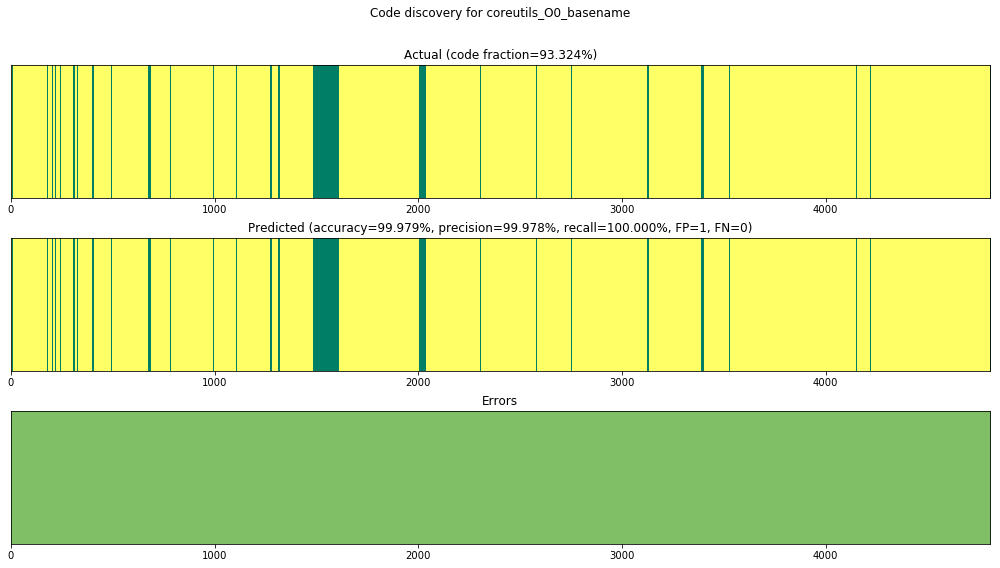

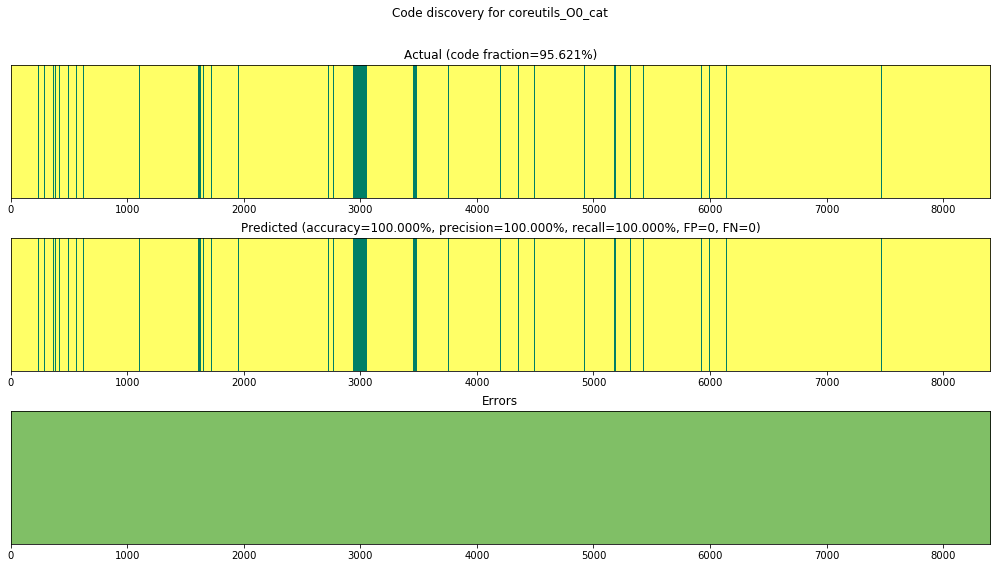

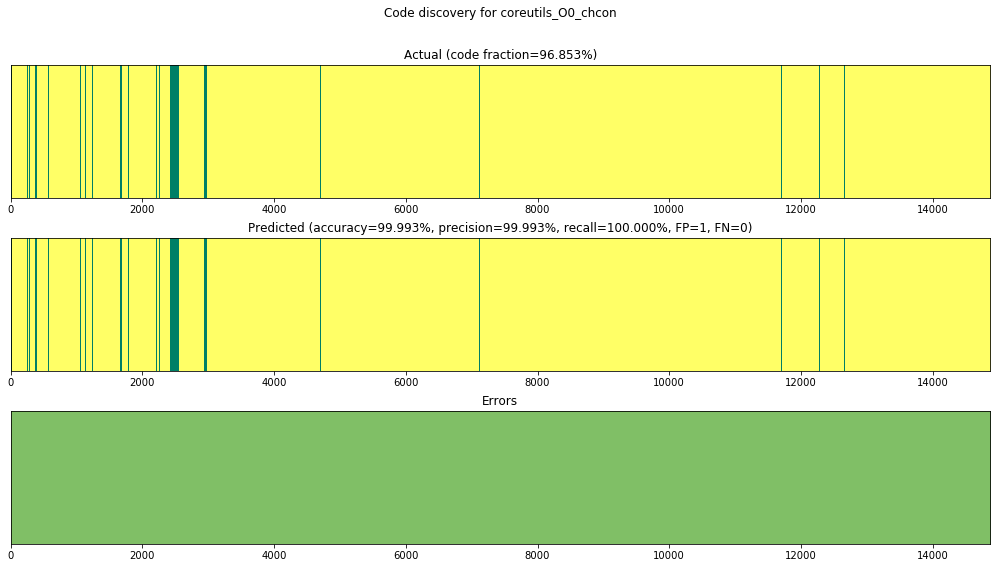

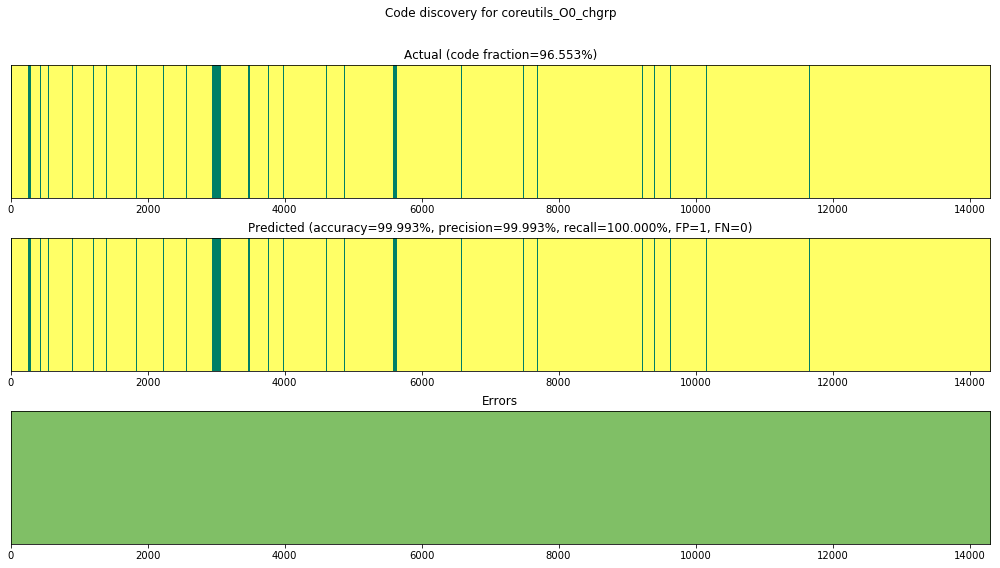

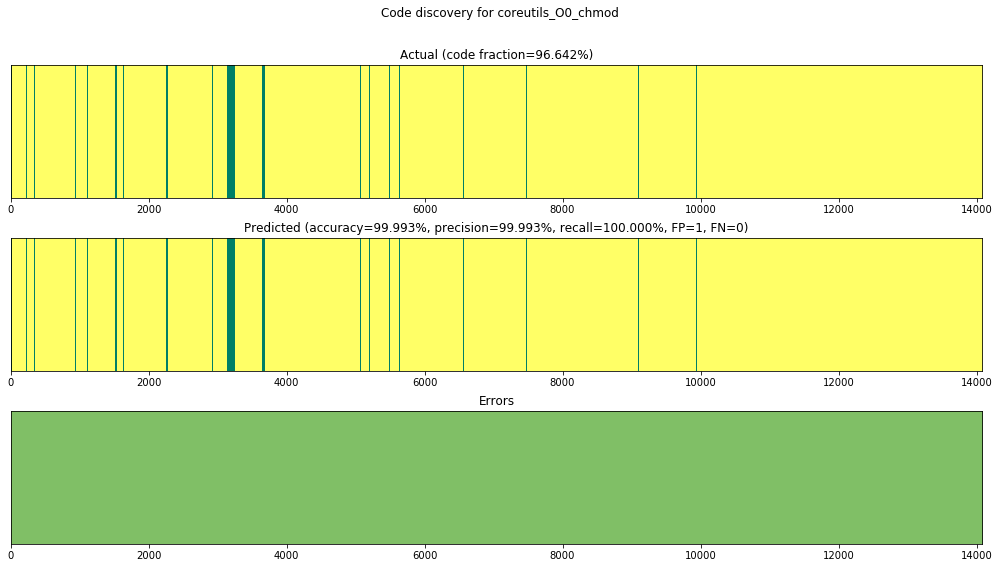

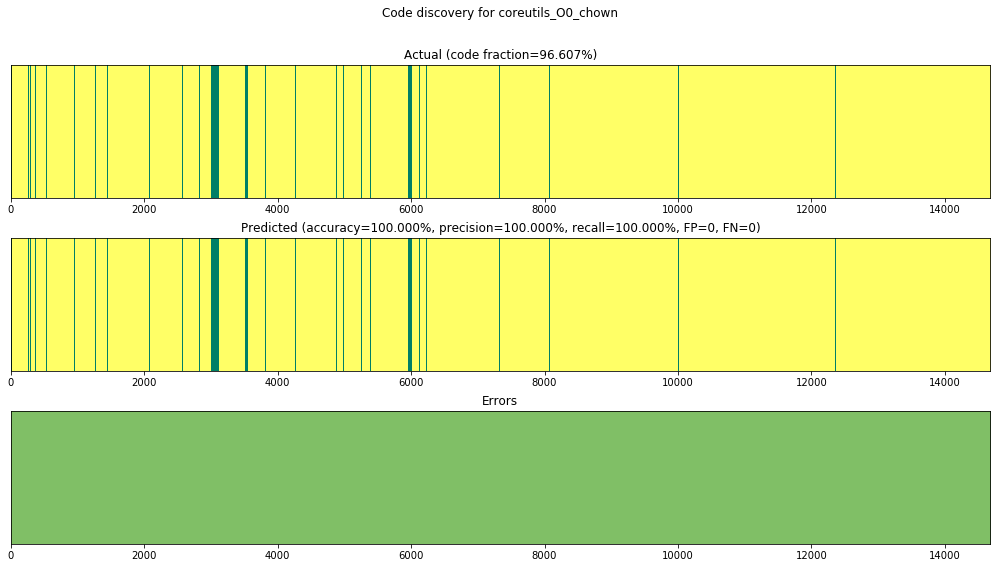

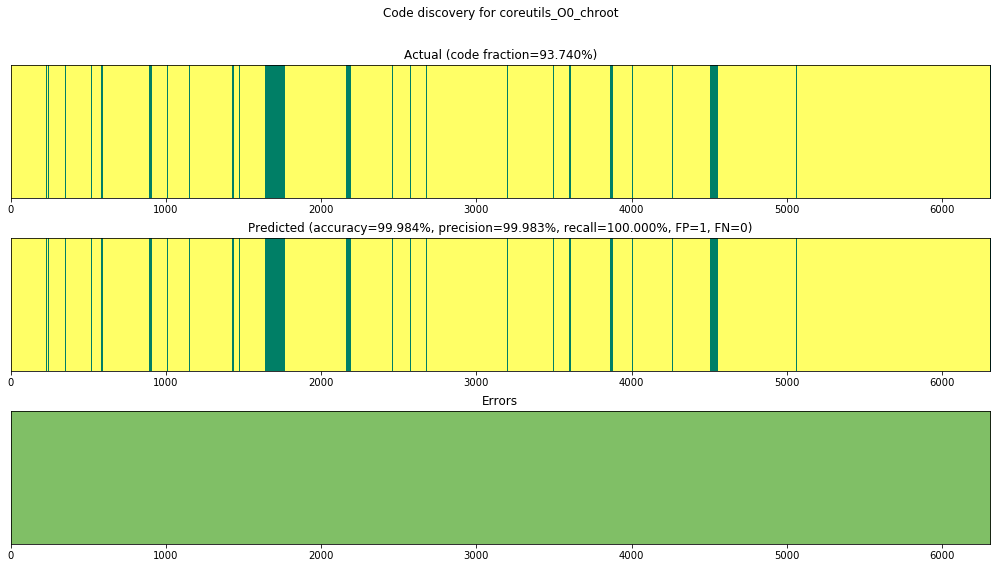

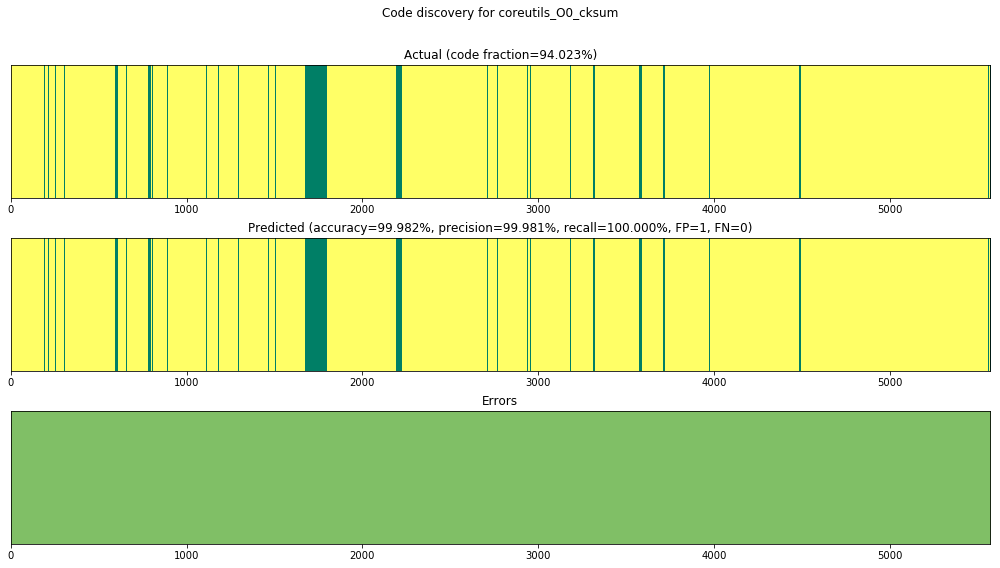

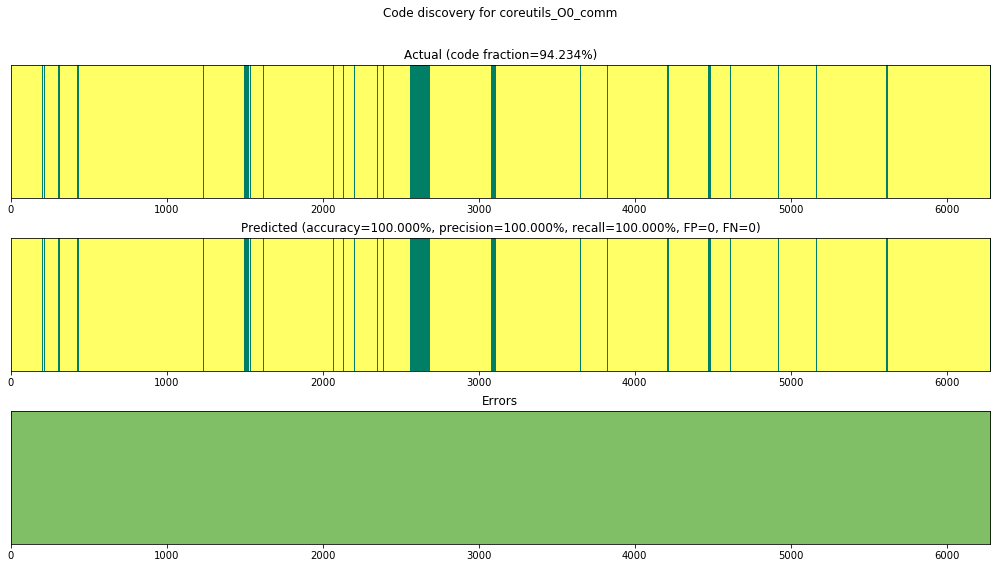

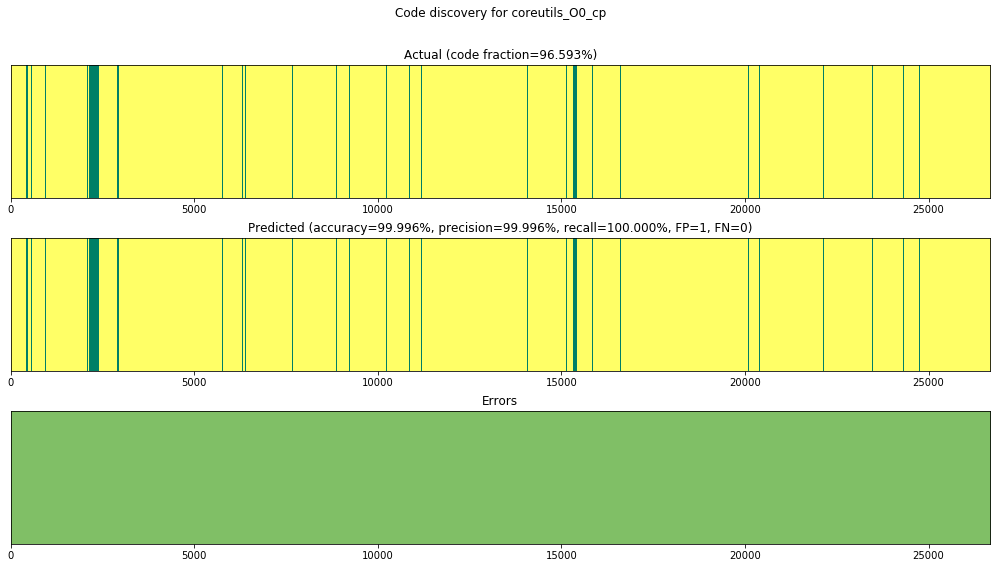

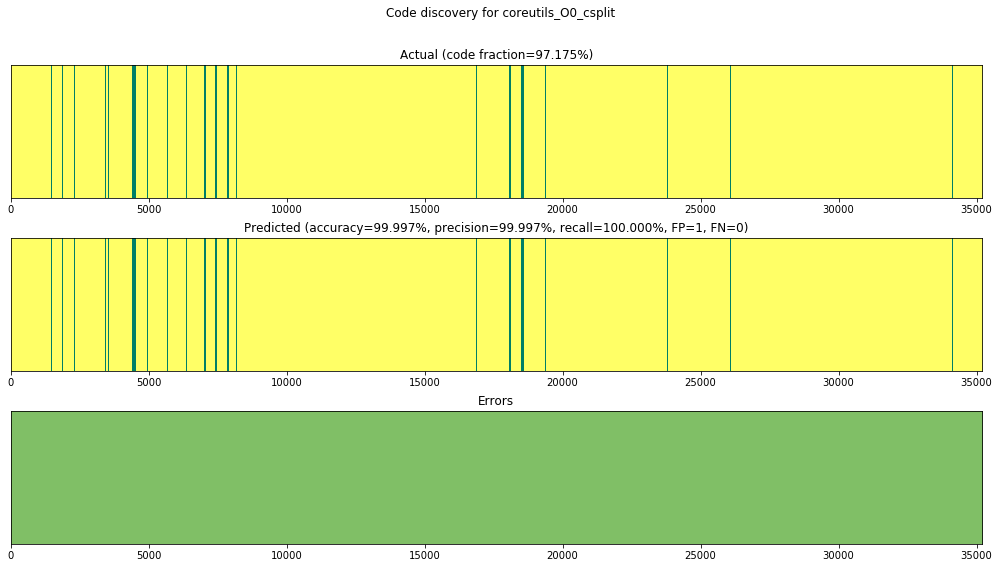

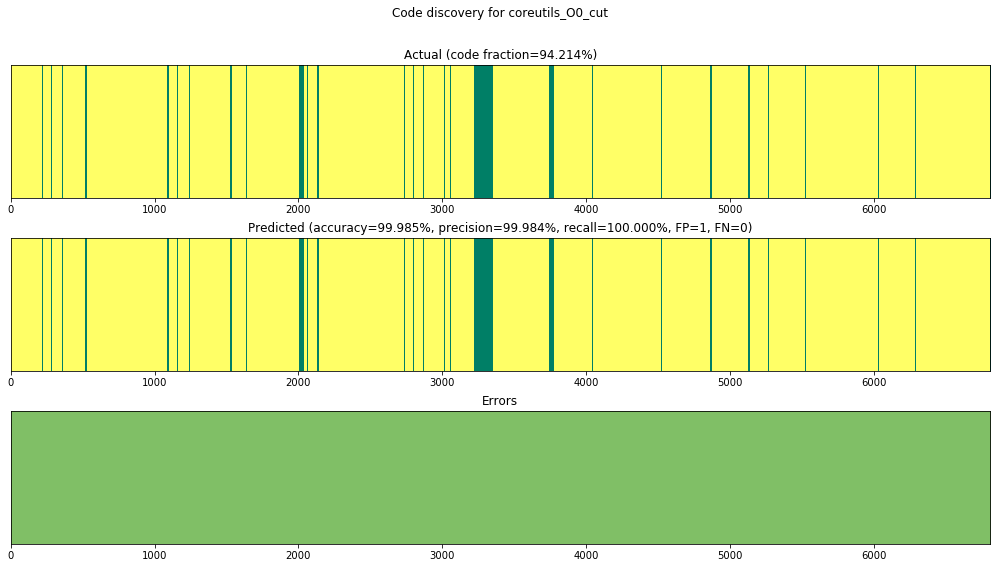

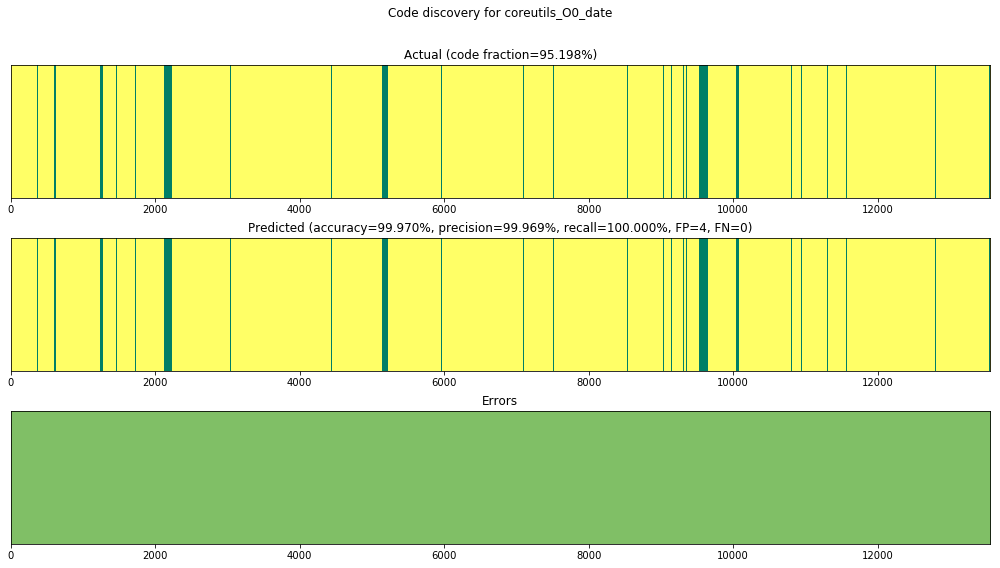

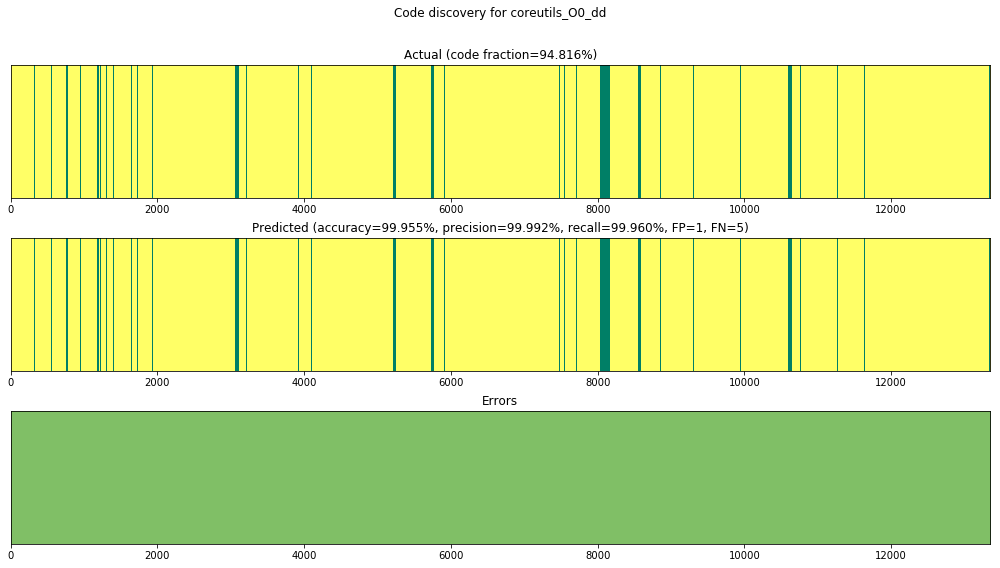

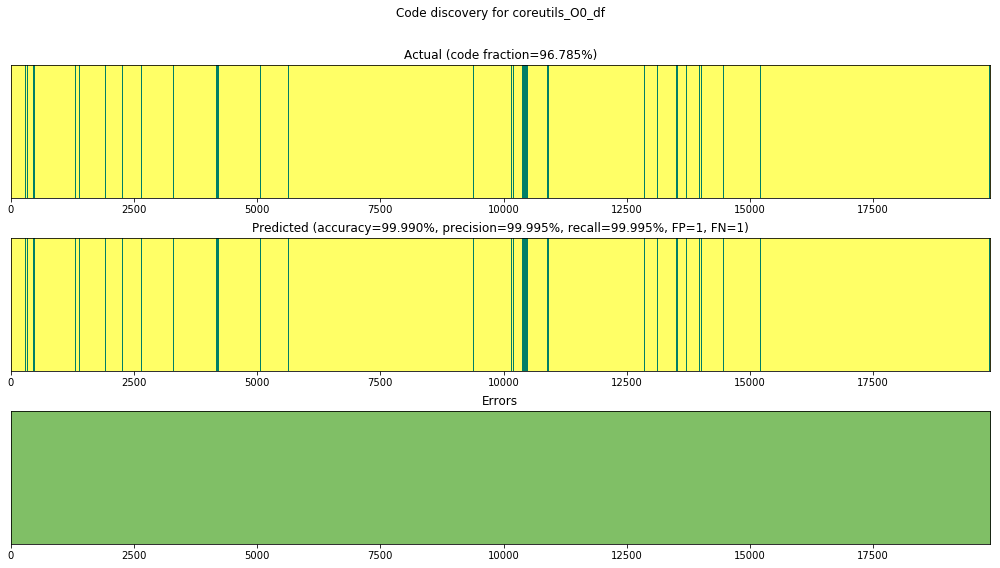

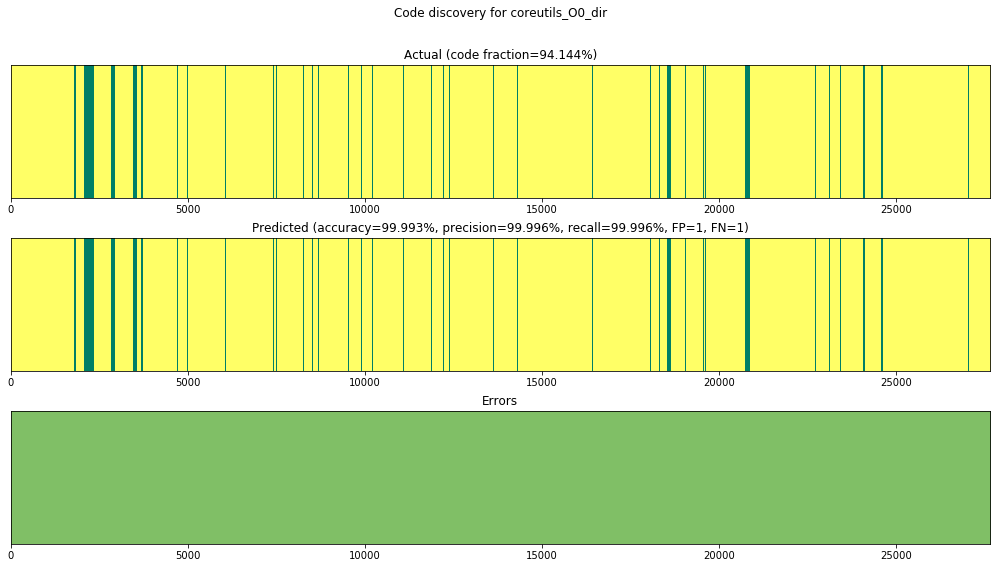

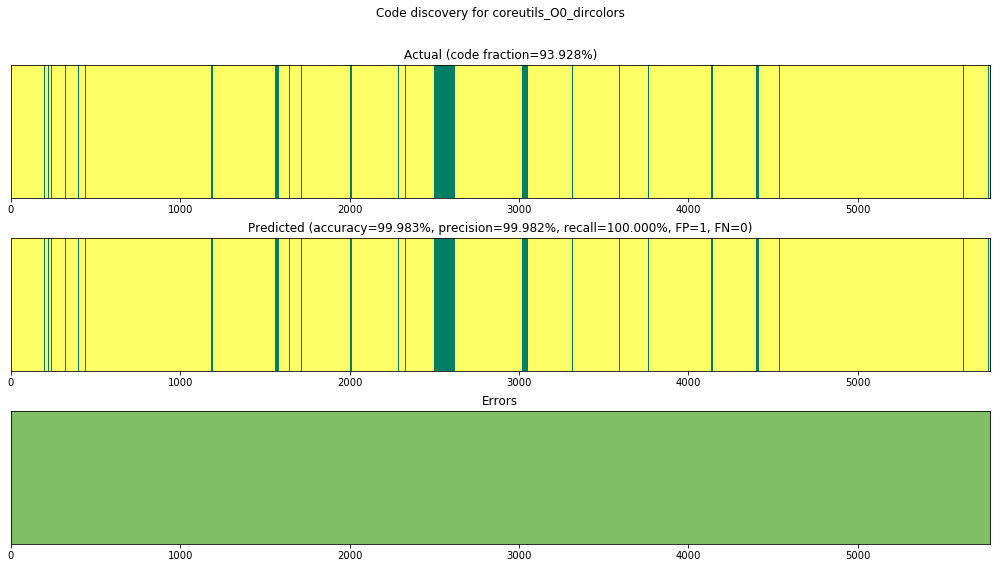

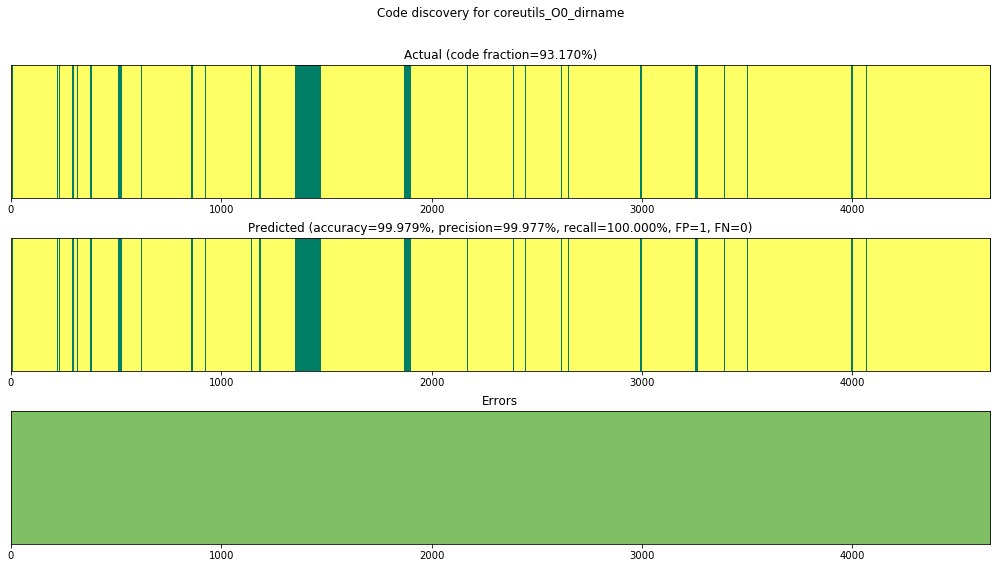

In [12]:
paths_test2 = [f_path.path for f_path in os.scandir("/Volumes/Tesi/Dataset/arm-binaries/coreutils_O0")]
X_test2, y_test2 = arm_feat.preprocess(paths_test2)

accuracies = []

for x, y, path in list(zip(X_test2, y_test2, paths_test2))[:20]:
    acc, fp, fn = plot_binaries(crf, x, y, path)
    accuracies.append(acc)
    
print("Average accuracy: {:.3f}%".format(np.mean(accuracies)*100))